# Michelle Kouba
### Improving Future LA Dodgers Attendance - Linear Regression

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Turning off warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [ ]:
# Opening MLB datafile and inspecting it
df = pd.read_csv('dodgers-2022.csv')
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [ ]:
# Checking for missing values
df.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [ ]:
# Checking how many variables and respondents we have.
df.shape

(81, 12)

In [ ]:
# Getting more information about the 12 variables.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB
None


In [ ]:
# Further inspecting the dataframe
print(df.describe())

             day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.000000


We have twelve variables and 81 game days worth of data.  Most of the variables are binary/boolean or continuous.  There is no missing data.  For variables, we have month of attendance, day of attendance and day of month of attendance.  We also have number of attendance, who the away team is, the weather and temperature for the day, time of day, and whether certain items were offered as a perk for attendance (I'm guessing).  Attendance ranges from 24312 to 56000 (a check online shows that max attendance for LA Dodgers Stadium is 56,000).  Variables used to improve attendance need to be things that you can control for (key drivers than you can move up or down and affect attendance).  So we'll likely be focusing on day_night, cap, shirt, fireworks, and bobblehead for sure but will know more after EDA. I did think about combining Month and Date into a "continuous variable" but month on it's own seemed to be a better predictor.

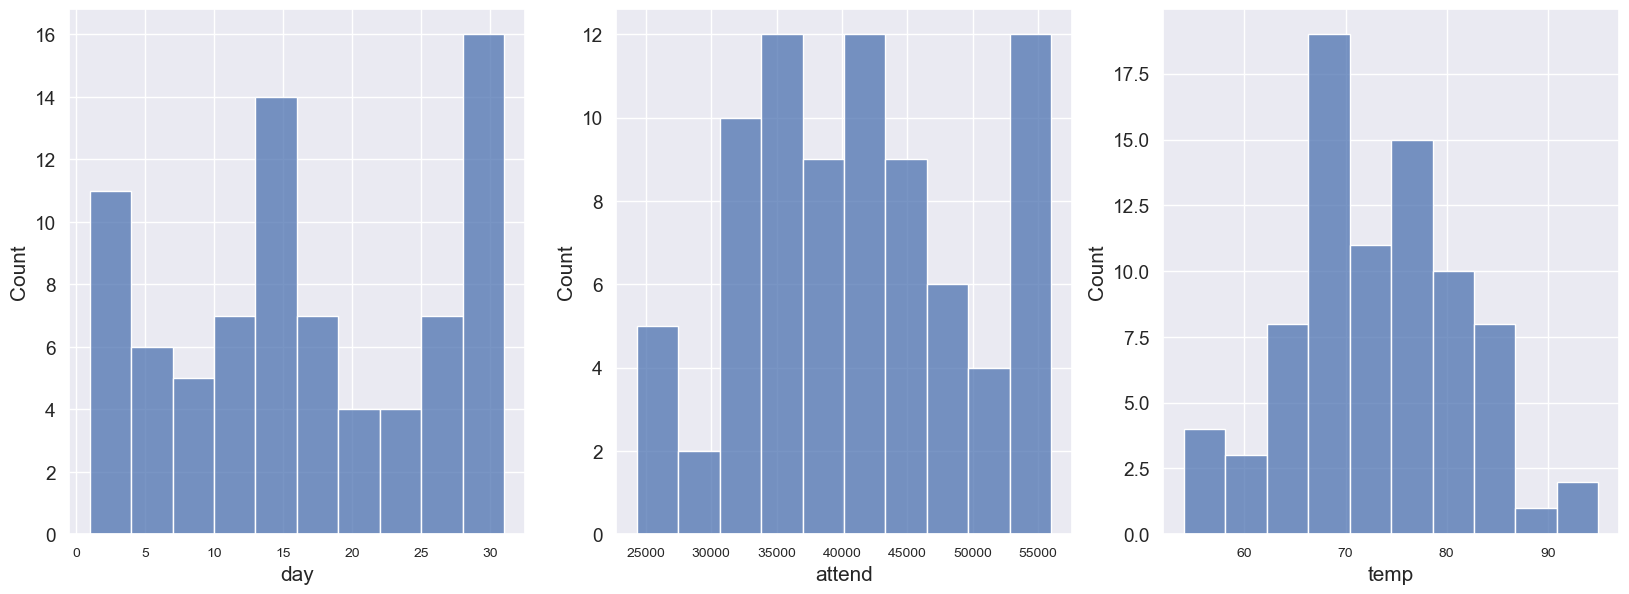

In [ ]:
# Creating a histogram to view the distribution of the continuous variables.
# Plotting the histograms of both numeric variables, BMI and age
cols = ["day", "attend", "temp"]
plt.figure(figsize=(20,15))
for i,col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=col, bins=10)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd4f3adac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd4f3c20a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd4f3ad7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd4f3c2640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd4f3c2910>],
 'means': []}

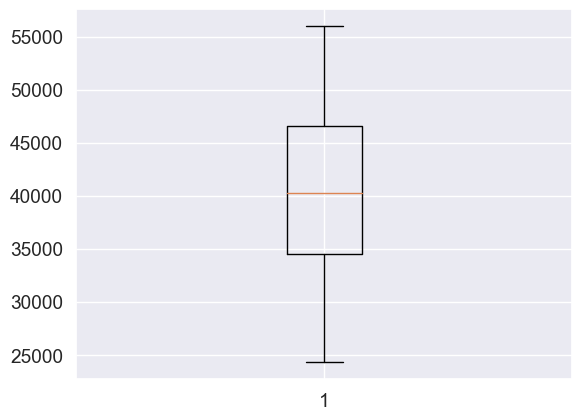

In [ ]:
# Plotting attendance by boxplot to find if there are any outliers.
plt.boxplot(df.attend)

While temperature is close to being normally distributed, both day and attendance are not.  Games are more likely to be at the beginning, middle or end of the month (trimodal if that's a word).  Attendance leans towards somewhat of a normalish distribution except for it has a max capacity of 56000, causing the spike toward the right, but also have more days where attendance was low.  Ive also generally thought that you really need more data points than this to really see the distribution of data so these are best guesses.   

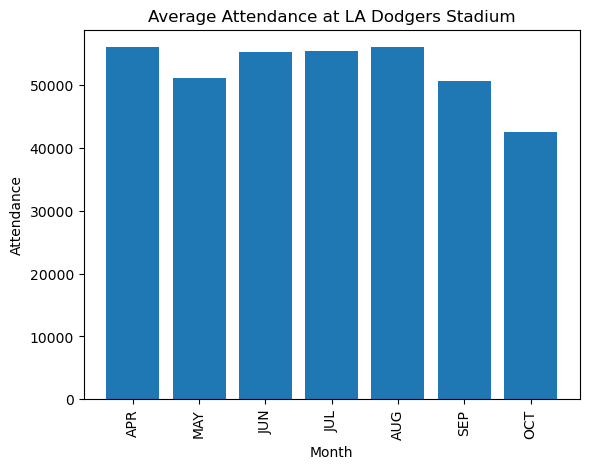

In [ ]:
# Creating bar charts of attendance by Categorical Data
# Creating bar charts of attendance by Month
plt.bar(df.month, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Month')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

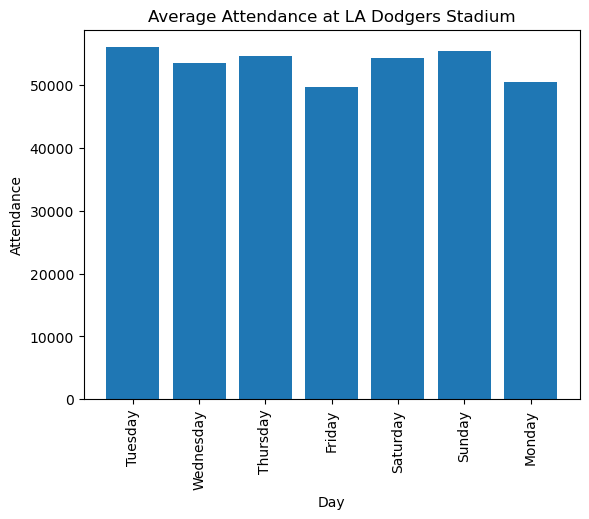

In [ ]:
# Creating a bar chart of attendance by Day of Week
plt.bar(df.day_of_week, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Day')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

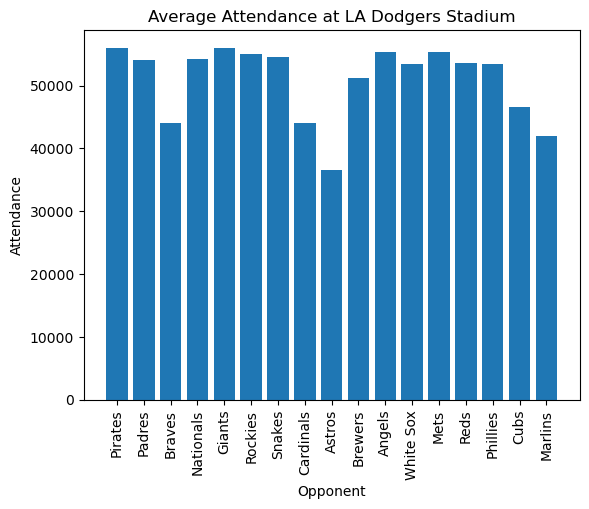

In [ ]:
# Creating a bar chart of attendance by Opponent
plt.bar(df.opponent, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Opponent')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

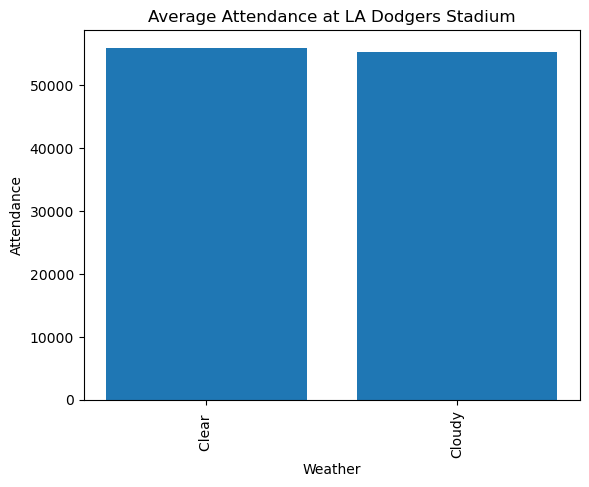

In [ ]:
# Creating a bar chart of attendance by Weather
plt.bar(df.skies, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Weather')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

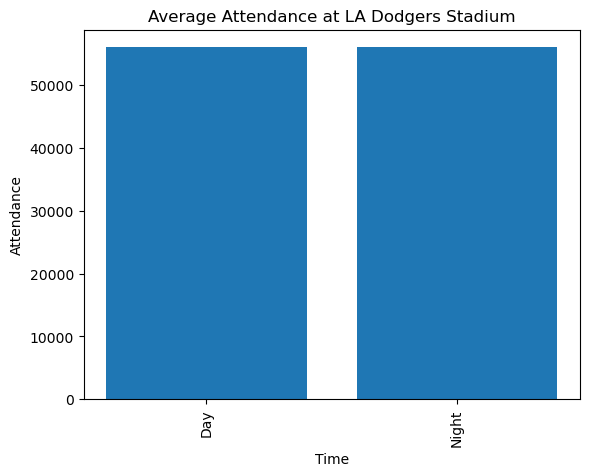

In [ ]:
# Creating a bar chart of attendance by Time of Game
plt.bar(df.day_night, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Time')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

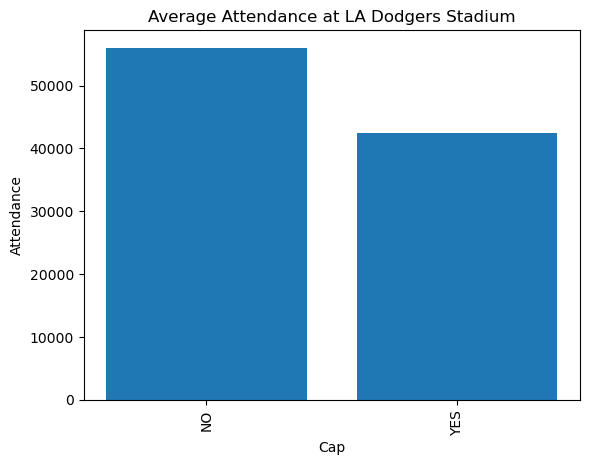

In [ ]:
# Creating a bar chart of attendance by Promotion Offered - Cap
plt.bar(df.cap, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Cap')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

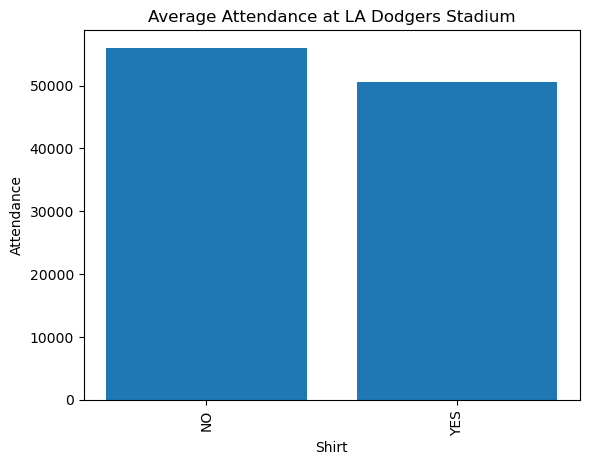

In [ ]:
# Creating a bar chart of attendance by Promotion Offered - Shirt
plt.bar(df.shirt, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Shirt')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

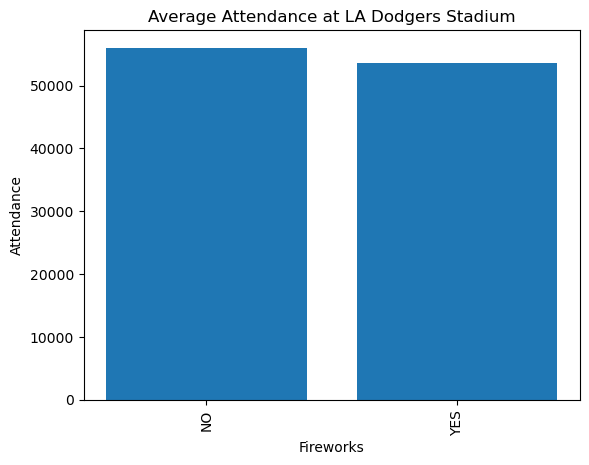

In [ ]:
# Creating a bar chart of attendance by Promotion Offered - Fireworks
plt.bar(df.fireworks, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Fireworks')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

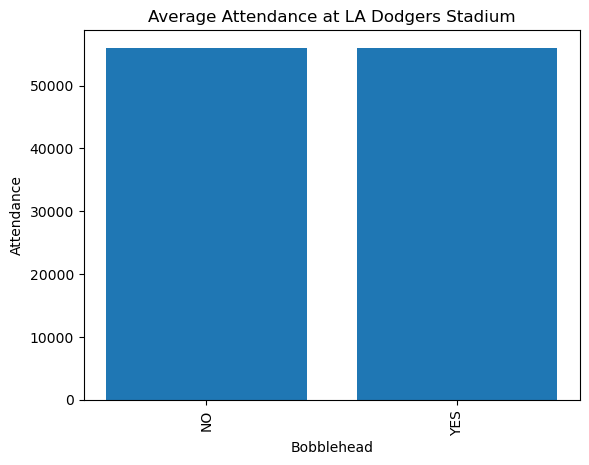

In [ ]:
# Creating a bar chart of attendance by Promotion Offered - Bobblehead
plt.bar(df.bobblehead, df.attend)
plt.title('Average Attendance at LA Dodgers Stadium')
plt.xlabel('Bobblehead')
plt.ylabel('Attendance')
plt.xticks(rotation = 90)
plt.show()

I'll run a heatmap/correlation matrix to confirm but it looks like most promotional events are either negatively correlated with or show no relationship with attendance so that's puzzling.  Attendance also seems to drop towards the end of the season (attendance was higher in April compared to October), possibly due to fans losing interest if the Dodgers don't have a good record or likelihood of going to the World Series but that's speculation.  Monday and Friday are lower attendance days and certain teams as opponents really have much lower attendance (Astros, Brave, Cardinals, Cubs, and Marlins).  Fans tended to attend a little more on clear days as opposed to cloudy days.

There were only two days the cap promotion was offered, three days the shirt promotion was offered, 14 times fireworks were displayed, and 11 times the bobblehead promotion was run.  At no time was any promotion running concurrently with another so any "correlation" between those four items can be negated.   I won't use the cap or shirt promotion because there's not enough data available (I did try leaving them in and they added very little "extra R2" to the model) and those promotions might already be offered on days when attendance is by far the lowest (or unsuccessful) as the data above shows they are MORE likely to have lower attendance.  I also attended to create a composite variable of promo type or NO promo that day but it didn't add anything of value to the model).  

In [ ]:
# Removing irrevelant variables
# Removing cap and shirt because there isn't enough data for it (only offered 2 or 3 days total).
# Removing weather because games are set long before the weather is known and this can't be changed last minute.
# Also removing temperature as this can't be predicted ahead of time other than an increase then decrease as the months pass so months will contain this data as well.
# Also deleting date of the month because this feature is not correlated with attendance and unlikely to have any effect on it. (any correlation is likely spurious)
# Games against all teams are regulated based on what division Dodgers are in (more games against teams in your division so all those
# variables aren't things that can be manipulated/modified to create higher attendance).  That variable is removed as well.
df = df.drop('cap', axis=1)
df = df.drop('shirt', axis=1)
df = df.drop('skies', axis=1)
df = df.drop('temp', axis=1)
df = df.drop('day', axis=1)
df = df.drop('opponent', axis=1)

In [ ]:
## Splitting the database into two types of columns to create dummy variables for the categorical columns.
numeric_columns = df.select_dtypes(include=np.number)
categorical_columns = df.select_dtypes(include=['object'])
# Creating dummy columns for all the categorical variables
categorical_columns = pd.get_dummies(categorical_columns)
# Merging numeric and categorical columns back together
df = pd.concat([numeric_columns, categorical_columns],axis=1)
# Dropping duplicates
df = df.drop_duplicates()
# Dropping second dummies
df = df.drop('bobblehead_NO', axis=1)
df = df.drop('fireworks_NO', axis=1)

In [ ]:
# Creating correlation matrix to see which variables are highly correlated.
corrmat = df.corr()
corrmat

,attend,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,day_night_Day,day_night_Night,fireworks_YES,bobblehead_YES
attend,1.000000,-0.073237,0.098944,0.143837,0.295853,-0.239471,-0.103132,-0.105443,-0.048948,-0.307198,0.107788,0.065153,-0.019679,0.355316,-0.174723,0.043544,-0.043544,0.002094,0.581895
month_APR,-0.073237,1.000000,-0.198811,-0.173913,-0.147442,-0.222911,-0.081786,-0.173913,0.007013,-0.076087,0.007013,0.007013,0.037438,0.007013,0.021739,0.069584,-0.069584,-0.006808,-0.063872
month_AUG,0.098944,-0.198811,1.000000,-0.198811,-0.168550,-0.254824,-0.093495,-0.198811,0.051309,-0.019881,-0.035275,-0.035275,0.009782,-0.035275,0.069584,0.018182,-0.018182,0.034245,0.089337
month_JUL,0.143837,-0.173913,-0.198811,1.000000,-0.147442,-0.222911,-0.081786,-0.173913,-0.087664,0.119565,-0.087664,0.007013,-0.106966,0.101690,0.021739,-0.019881,0.019881,-0.006808,0.139015
month_JUN,0.295853,-0.147442,-0.168550,-0.147442,1.000000,-0.188982,-0.069338,-0.147442,0.059456,-0.036860,0.059456,-0.047565,0.072548,-0.047565,-0.036860,0.033710,-0.033710,0.046176,0.089188
month_MAY,-0.239471,-0.222911,-0.254824,-0.222911,-0.188982,1.000000,-0.104828,-0.222911,0.008989,0.027864,0.008989,0.008989,-0.013710,0.008989,-0.055728,-0.101929,0.101929,-0.008726,-0.038526
month_OCT,-0.103132,-0.081786,-0.093495,-0.081786,-0.069338,-0.104828,1.000000,-0.081786,-0.085749,0.102233,-0.085749,-0.085749,-0.050303,0.092345,0.102233,-0.093495,0.093495,-0.089648,-0.077743
month_SEP,-0.105443,-0.173913,-0.198811,-0.173913,-0.147442,-0.222911,-0.081786,1.000000,0.007013,-0.076087,0.101690,0.101690,0.037438,-0.087664,-0.076087,0.069584,-0.069584,-0.006808,-0.165315
day_of_week_Friday,-0.048948,0.007013,0.051309,-0.087664,0.059456,0.008989,-0.085749,0.007013,1.000000,-0.182341,-0.191176,-0.191176,-0.112149,-0.191176,-0.182341,-0.208445,0.208445,0.956512,-0.173326
day_of_week_Monday,-0.307198,-0.076087,-0.019881,0.119565,-0.036860,0.027864,0.102233,-0.076087,-0.182341,1.000000,-0.182341,-0.182341,-0.106966,-0.182341,-0.173913,-0.198811,0.198811,-0.190631,-0.165315


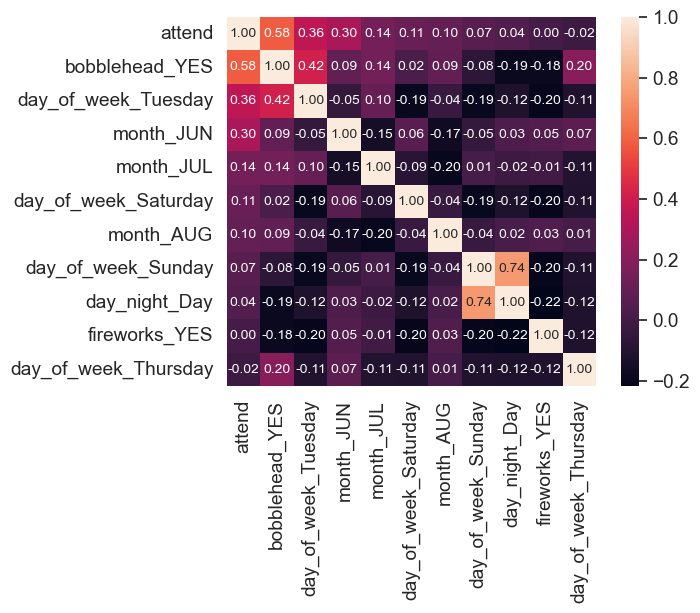

In [ ]:
# Top 10 Heatmap
k = 11
cols = corrmat.nlargest(11, 'attend')['attend'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

It's important to note that the top list highly correlated items with attendance are (in order): bobblehead promotion, Tuesday games, games in June or July, and Saturday games.

## Linear Regression for Predictive Analytics

I decided to use a multiple linear regression with the data due to the fact that attendance is a continuous variable and linear regression is used to predict the value of a single continuous variable (attendance) by using multiple independent variables who are known to have a relationship with the dependent variable (attendance).

In [ ]:
# Creating X and Y variables for analysis.
# Creating variables for features
X = df.drop(['attend'],axis=1)
# Creating predictor variable
y = df['attend']

I chose not to split the file into test/training data due to the low number of game days (81 days).   I also decided to run the data both ways to see if the fit is better and it was much better without being split (r2 = .59 vs .20 split into train/test).

In [ ]:
# Running a linear regression on the test set.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import StandardScaler
#Standardize the feature matrix
#Defining Scaler
sc = StandardScaler()
#Scaling training features
training_features = sc.fit_transform(X)
# Fitting the training data
lr.fit(training_features, y)

LinearRegression()

In [ ]:
# Printing the Coefficients for each of the predictor variables in training model.
pd.DataFrame(lr.coef_, X.columns, columns = ['Coeff'])

,Coeff
month_APR,-340.815980
month_AUG,545.050500
month_JUL,138.891504
month_JUN,1893.195537
month_MAY,-1376.385640
month_OCT,-238.920459
month_SEP,-331.109691
day_of_week_Friday,-5041.001211
day_of_week_Monday,-409.217781
day_of_week_Saturday,1771.484963


In [ ]:
# Printing the Intercept of the training model.
print('The intercept of the training model is',lr.intercept_)

The intercept of the training model is 41040.07407407407


Note that the higher coefficients above are likely to move, on average, attendance in the positive direction that number of people from the intercept (which is 41040 persons).  For example 41040 persons are likely to attend on any given day as a base number but it's predicted that number can jump up 2341 person (estimated) on a Tuesday.  Similarly, if attendance might be decreased (estimated) 5041 persons on a Friday.  The highest coefficients for prediction are games with fireworks afterwards, games where the bobblehead promotion is running, Tuesdays, and games in the month of June.  These all contribute to higher attendance because the coefficients are positive.  On the other hand, games on a Friday are not good for attendance at all (the second highest coefficient for predicting attendance).  Estimated attendance on those days falls to around 36,000 (41040 - 5041).

In [ ]:
# Predicting the Testing set results
y_pred = lr.predict(training_features)

In [ ]:
# Calculating the R squared value of the model.
from sklearn.metrics import r2_score
print('The R-squared of this linear regression model is',r2_score(y, y_pred))

The R-squared of this linear regression model is 0.5898728002339265


In [ ]:
# Calculating the RMSE on the model.
#setting squared=False to get the RMSE
from sklearn.metrics import mean_squared_error
print('The RMSE of this model is', mean_squared_error(y, y_pred, squared=False))

The RMSE of this model is 5280.938342163833


In [ ]:
# Calculating the MAE on the model.
from sklearn.metrics import mean_absolute_error
print('The MAE of theis model is', mean_absolute_error(y, y_pred))

The MAE of theis model is 4113.062584102123


The R2 for this model is .59 showing that this model is a good fit for the data.   Generally I'd like to see a larger number to say a good (or better) fit but given the data and the number of features to work with, I think this is a good model given the restrictions.  Roughly 60% of the variance in attendance can be explained by the model.  The RMSE of 5281 and the MAE of 4113 both seem to be large but we need to remember we are talking about data in with an average of 41010 (the same as the intercept, not sure if that's a good thing) in attendance so predicting attend plus or minus anything around 4000 is pretty good.

(20000.0, 60000.0)

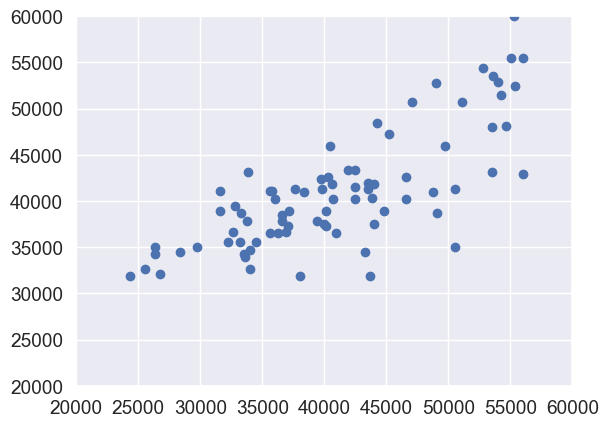

In [ ]:
# Plotting a scatterplot of actual attendance versus predicted attendance
# Plotting the actual test values vs the predicted values for the testing set.
plt.scatter(y, y_pred)
# Set the range of x-axis
plt.xlim(20000, 60000)
# Set the range of y-axis
plt.ylim(20000, 60000)

This scatterplot shows that this model tends to overestimate attendance and that most of the variance unexplained in the model is in that range.  Given that this model is attempting to help guide us in how to raise attendance, that could be a limitation.

## Analysis and Conclusion

The focus of this assignment is to gauge, given some attendance data, how to maximize attendance as close to 56,000 as possible (the maximum capacity of LA Dodgers Stadium).  A multiple linear regression was run using scaled data (scaled data is ideal so that the data is standardized).  Attendance was set as the predictor and the features selected were features than can be manipulated (month, day of the week, time of day, fireworks and bobblehead promotion).  Other data can provide valuable insight into attendance but if it can't modified, it can't be used to increase attendance.  The top predictors of increased attendance are games with fireworks afterwards, games where the bobblehead promotion is running, Tuesdays, and games in the month of June.  Consequently games on Friday tend to have lower attendance numbers.   How do we work with these findings?  Well, scheduling takes place a long time before the season starts so I'm not sure how much flexibility the general managers/owners have in setting the schedule but setting more games in June and on Tuesdays should be pushed if available.  If this isn't an opinion, offering more games with a fireworks show afterwards is a great way to boost attendance (but it can be costly so the owners will need to figure out if the increased attendance, merchandise, food, and other spending for roughly 6500 extra people outweights the fireworks cost.

Another important thing to note is that while the variables in the bar charts aren't all used in the analyses to predict better attendance for various reasons, they can give the GM an idea of which types of games to run the fireworks promotion or another similar promotion on.  For example, attendance is likely to be max or near max when certain teams are playing so applying any incentive on the days these teams are playing isn't advisable (max is 56,000 so you can't push past that).  However, noting when some of the less liked opponents, such as the Astros are playing and trying to max incentives such as fireworks on those days could really make a big difference in overall attendance on those days.  Another less likely possibility is to schedule those teams on Fridays when attendance is unlikely to be high anyway and perhaps those teams won't take up the other higher capacity days.

While weather can't be accounted for, when setting up the game schedule if possible, it's important to note that April tended to have more cloudy days and they tend to have smaller attendance.  However, I'm not sure if that means people bought and didn't use tickets or were more likely to buy last minute tickets on nice days or some other factor.  Another possibility to upping these poorer weather days (more cloudy days in April) or cloudy days in general is offering free promotions such as umbrellas or something similar if the game is rained out or fans are getting wet.  

References:
LA Dodgers attendance data from 2022 (I have no official citation as Blackboard didn't offer one and data was housed on bellevue.edu).